In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('grades').getOrCreate()


In [2]:
students_data = spark.read.csv('student-mat.csv', inferSchema=True, header=True)
students_data.printSchema()
print((students_data.count(), len(students_data.columns)))

root
 |-- school: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- famsize: string (nullable = true)
 |-- Pstatus: string (nullable = true)
 |-- Medu: integer (nullable = true)
 |-- Fedu: integer (nullable = true)
 |-- Mjob: string (nullable = true)
 |-- Fjob: string (nullable = true)
 |-- reason: string (nullable = true)
 |-- guardian: string (nullable = true)
 |-- traveltime: integer (nullable = true)
 |-- studytime: integer (nullable = true)
 |-- failures: integer (nullable = true)
 |-- schoolsup: string (nullable = true)
 |-- famsup: string (nullable = true)
 |-- paid: string (nullable = true)
 |-- activities: string (nullable = true)
 |-- nursery: string (nullable = true)
 |-- higher: string (nullable = true)
 |-- internet: string (nullable = true)
 |-- romantic: string (nullable = true)
 |-- famrel: integer (nullable = true)
 |-- freetime: integer (nullable = true)
 |-- goout: integer (null

In [68]:
students_data.show()

+------+---+---+-------+-------+-------+----+----+----+----+------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+
|school|sex|age|address|famsize|Pstatus|Medu|Fedu|Mjob|Fjob|reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G3|
+------+---+---+-------+-------+-------+----+----+----+----+------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+
|     1|  0| 18|      0|      1|      1|   4|   4|   3|   0|     2|       0|         2|        2|       0|        0|     1|   1|         1|      0|     0|       1|       1|     4|       3|    4|   1|   1|     3|       0|  1|
|     1|  0| 17|      0|      1|      0|   1|   1|   3|   3|     2|       1|         1|        2|   

In [4]:
students_data.dtypes

[('school', 'string'),
 ('sex', 'string'),
 ('age', 'int'),
 ('address', 'string'),
 ('famsize', 'string'),
 ('Pstatus', 'string'),
 ('Medu', 'int'),
 ('Fedu', 'int'),
 ('Mjob', 'string'),
 ('Fjob', 'string'),
 ('reason', 'string'),
 ('guardian', 'string'),
 ('traveltime', 'int'),
 ('studytime', 'int'),
 ('failures', 'int'),
 ('schoolsup', 'string'),
 ('famsup', 'string'),
 ('paid', 'string'),
 ('activities', 'string'),
 ('nursery', 'string'),
 ('higher', 'string'),
 ('internet', 'string'),
 ('romantic', 'string'),
 ('famrel', 'int'),
 ('freetime', 'int'),
 ('goout', 'int'),
 ('Dalc', 'int'),
 ('Walc', 'int'),
 ('health', 'int'),
 ('absences', 'int'),
 ('G1', 'int'),
 ('G2', 'int'),
 ('G3', 'int')]

In [5]:
students_data.head(1)

[Row(school='GP', sex='F', age=18, address='U', famsize='GT3', Pstatus='A', Medu=4, Fedu=4, Mjob='at_home', Fjob='teacher', reason='course', guardian='mother', traveltime=2, studytime=2, failures=0, schoolsup='yes', famsup='no', paid='no', activities='no', nursery='yes', higher='yes', internet='no', romantic='no', famrel=4, freetime=3, goout=4, Dalc=1, Walc=1, health=3, absences=6, G1=5, G2=6, G3=6)]

In [6]:
students_data.describe('G3').show()

+-------+------------------+
|summary|                G3|
+-------+------------------+
|  count|               395|
|   mean|10.415189873417722|
| stddev|4.5814426109978434|
|    min|                 0|
|    max|                20|
+-------+------------------+



In [7]:
students_data.groupby('failures').mean('G3').show()

+--------+------------------+
|failures|           avg(G3)|
+--------+------------------+
|       1|              8.12|
|       3|            5.6875|
|       2| 6.235294117647059|
|       0|11.253205128205128|
+--------+------------------+



In [8]:
students_data.groupby('studytime').mean('G3').show()

+---------+------------------+
|studytime|           avg(G3)|
+---------+------------------+
|        1|10.047619047619047|
|        3|              11.4|
|        4| 11.25925925925926|
|        2|10.171717171717171|
+---------+------------------+



In [9]:
students_data.groupby('sex').mean('G3').show()

+---+------------------+
|sex|           avg(G3)|
+---+------------------+
|  F| 9.966346153846153|
|  M|10.914438502673796|
+---+------------------+



In [10]:
students_data.groupby('G3').count().show()

+---+-----+
| G3|count|
+---+-----+
| 12|   31|
| 13|   31|
|  6|   15|
| 16|   16|
| 20|    1|
|  5|    7|
| 19|    5|
| 15|   33|
|  9|   28|
| 17|    6|
|  4|    1|
|  8|   32|
|  7|    9|
| 10|   56|
| 11|   47|
| 14|   27|
|  0|   38|
| 18|   12|
+---+-----+



In [43]:
students_data.groupby().mean('G3').show()

+------------------+
|           avg(G3)|
+------------------+
|10.415189873417722|
+------------------+



In [41]:
from pyspark.sql.functions import col, avg

In [42]:
students_data.select(avg(students_data('G3'))).show()

TypeError: 'DataFrame' object is not callable

In [48]:
students_data.crosstab('address', 'traveltime').show()

+------------------+---+---+---+---+
|address_traveltime|  1|  2|  3|  4|
+------------------+---+---+---+---+
|                 R| 35| 34| 14|  5|
|                 U|222| 73|  9|  3|
+------------------+---+---+---+---+



In [50]:
from pyspark.sql import functions as F
students_data.filter(F.isnull()).show()

TypeError: isnull() missing 1 required positional argument: 'col'

In [58]:
from pyspark.sql.functions import col
students_data.describe().filter(col("summary") == "count").show()


+-------+------+---+---+-------+-------+-------+----+----+----+----+------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+
|summary|school|sex|age|address|famsize|Pstatus|Medu|Fedu|Mjob|Fjob|reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G1| G2| G3|
+-------+------+---+---+-------+-------+-------+----+----+----+----+------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+
|  count|   395|395|395|    395|    395|    395| 395| 395| 395| 395|   395|     395|       395|      395|     395|      395|   395| 395|       395|    395|   395|     395|     395|   395|     395|  395| 395| 395|   395|     395|395|395|395|
+-------+------+---+---+-------+----

In [59]:
from pyspark.sql.functions import lit

rows = students_data.count()
summary = students_data.describe().filter(col("summary") == "count")
summary.select(*((lit(rows)-col(c)).alias(c) for c in students_data.columns)).show()

+------+---+---+-------+-------+-------+----+----+----+----+------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+
|school|sex|age|address|famsize|Pstatus|Medu|Fedu|Mjob|Fjob|reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G1| G2| G3|
+------+---+---+-------+-------+-------+----+----+----+----+------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+
|   0.0|0.0|0.0|    0.0|    0.0|    0.0| 0.0| 0.0| 0.0| 0.0|   0.0|     0.0|       0.0|      0.0|     0.0|      0.0|   0.0| 0.0|       0.0|    0.0|   0.0|     0.0|     0.0|   0.0|     0.0|  0.0| 0.0| 0.0|   0.0|     0.0|0.0|0.0|0.0|
+------+---+---+-------+-------+-------+----+----+----+----+------+-

In [61]:
import pyspark.sql.functions as f
students_data.groupBy(students_data.columns).count().where(f.col('count') > 1).select(f.sum('count')).show()

+----------+
|sum(count)|
+----------+
|      null|
+----------+



In [3]:
columns_to_drop = ['G1', 'G2']
students_data= students_data.drop(*columns_to_drop)

In [102]:
students_data.dtypes

[('school', 'string'),
 ('sex', 'string'),
 ('age', 'int'),
 ('address', 'string'),
 ('famsize', 'string'),
 ('Pstatus', 'string'),
 ('Medu', 'int'),
 ('Fedu', 'int'),
 ('Mjob', 'string'),
 ('Fjob', 'string'),
 ('reason', 'string'),
 ('guardian', 'string'),
 ('traveltime', 'int'),
 ('studytime', 'int'),
 ('failures', 'int'),
 ('schoolsup', 'string'),
 ('famsup', 'string'),
 ('paid', 'string'),
 ('activities', 'string'),
 ('nursery', 'string'),
 ('higher', 'string'),
 ('internet', 'string'),
 ('romantic', 'string'),
 ('famrel', 'int'),
 ('freetime', 'int'),
 ('goout', 'int'),
 ('Dalc', 'int'),
 ('Walc', 'int'),
 ('health', 'int'),
 ('absences', 'int'),
 ('G3', 'int')]

In [114]:
students_data.groupby('school').count().show()

+------+-----+
|school|count|
+------+-----+
|    MS|   46|
|    GP|  349|
+------+-----+



In [55]:
students_data.groupby('absences').count().show(100)

+--------+-----+
|absences|count|
+--------+-----+
|      28|    1|
|      26|    1|
|      12|   12|
|      22|    3|
|       1|    3|
|      13|    3|
|       6|   31|
|      16|    7|
|       3|    8|
|      20|    4|
|      40|    1|
|      54|    1|
|       5|    5|
|      19|    1|
|      15|    3|
|       9|    3|
|      17|    1|
|       4|   53|
|       8|   22|
|      23|    1|
|       7|    7|
|      10|   17|
|      38|    1|
|      25|    1|
|      24|    1|
|      21|    1|
|      75|    1|
|      56|    1|
|      11|    3|
|      14|   12|
|       2|   65|
|      30|    1|
|       0|  115|
|      18|    5|
+--------+-----+



In [90]:
students_data.groupby('G3').count().show()

+---+-----+
| G3|count|
+---+-----+
| 12|   31|
| 13|   31|
|  6|   15|
| 16|   16|
| 20|    1|
|  5|    7|
| 19|    5|
| 15|   33|
|  9|   28|
| 17|    6|
|  4|    1|
|  8|   32|
|  7|    9|
| 10|   56|
| 11|   47|
| 14|   27|
|  0|   38|
| 18|   12|
+---+-----+



In [4]:
import pyspark.sql.functions as f
students_data=students_data.withColumn('absences', f.when(f.col('absences') < 11, 'low absences'). otherwise('high absences'))

In [5]:
students_data.select('absences').show()

+-------------+
|     absences|
+-------------+
| low absences|
| low absences|
| low absences|
| low absences|
| low absences|
| low absences|
| low absences|
| low absences|
| low absences|
| low absences|
| low absences|
| low absences|
| low absences|
| low absences|
| low absences|
| low absences|
| low absences|
| low absences|
|high absences|
| low absences|
+-------------+
only showing top 20 rows



In [6]:
from pyspark.sql.functions import when, col
students_data=students_data.withColumn('G3', when((col('G3') >= 0) & (col('G3') <= 5), 'poor')\
                                       .when((col('G3') >5) & (col('G3') <= 10), 'normal')\
                                       .when((col('G3') >10) & (col('G3') <= 15), 'good').otherwise('verygood'))

In [7]:
students_data.select('G3').show()

+--------+
|      G3|
+--------+
|  normal|
|  normal|
|  normal|
|    good|
|  normal|
|    good|
|    good|
|  normal|
|verygood|
|    good|
|  normal|
|    good|
|    good|
|    good|
|verygood|
|    good|
|    good|
|  normal|
|    poor|
|  normal|
+--------+
only showing top 20 rows



In [8]:
students_data=students_data.withColumn('school', f.when(f.col('school') =='GP', 0). otherwise(1))
students_data=students_data.withColumn('sex', f.when(f.col('sex') == 'F', 0). otherwise(1))
students_data=students_data.withColumn('address', f.when(f.col('address') == 'U', 0). otherwise(1))
students_data=students_data.withColumn('famsize', f.when(f.col('famsize') == 'LE3', 0). otherwise(1))
students_data=students_data.withColumn('Pstatus', f.when(f.col('Pstatus') == 'T', 0). otherwise(1))
students_data=students_data.withColumn('Mjob', when(col('Mjob')== 'teacher', 0).when(col('Mjob')== 'health', 1).when(col('Mjob')== 'services', 2).otherwise(3))
students_data=students_data.withColumn('Fjob', when(col('Fjob')== 'teacher', 0).when(col('Fjob')== 'health', 1).when(col('Fjob')== 'services', 2).otherwise(3))
students_data=students_data.withColumn('reason', when(col('reason')== 'home', 0).when(col('reason')== 'reputation', 1).when(col('reason')== 'course', 2).otherwise(3))
students_data=students_data.withColumn('guardian', when(col('guardian')== 'mother', 0).when(col('guardian')== 'father', 1).otherwise(3))
students_data=students_data.withColumn('schoolsup', f.when(f.col('schoolsup') == 'yes', 0). otherwise(1))
students_data=students_data.withColumn('famsup', f.when(f.col('famsup') == 'yes', 0). otherwise(1))
students_data=students_data.withColumn('paid', f.when(f.col('paid') == 'yes', 0). otherwise(1))
students_data=students_data.withColumn('activities', f.when(f.col('activities') == 'yes', 0). otherwise(1))
students_data=students_data.withColumn('nursery', f.when(f.col('nursery') == 'yes', 0). otherwise(1))
students_data=students_data.withColumn('higher', f.when(f.col('higher') == 'yes', 0). otherwise(1))
students_data=students_data.withColumn('internet', f.when(f.col('internet') == 'yes', 0). otherwise(1))
students_data=students_data.withColumn('romantic', f.when(f.col('romantic') == 'yes', 0). otherwise(1))
students_data=students_data.withColumn('G3', when(col('G3')== 'poor', 0).when(col('G3')== 'normal', 1).when(col('G3')== 'good', 2).otherwise(3))
students_data=students_data.withColumn('absences', f.when(f.col('absences') == 'low absences', 0). otherwise(1))

In [136]:
students_data.show(200)

+------+---+---+-------+-------+-------+----+----+----+----+------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+
|school|sex|age|address|famsize|Pstatus|Medu|Fedu|Mjob|Fjob|reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G3|
+------+---+---+-------+-------+-------+----+----+----+----+------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+
|     0|  0| 18|      0|      1|      1|   4|   4|   3|   0|     2|       0|         2|        2|       0|        0|     1|   1|         1|      0|     0|       1|       1|     4|       3|    4|   1|   1|     3|       0|  1|
|     0|  0| 17|      0|      1|      0|   1|   1|   3|   3|     2|       1|         1|        2|   

In [137]:
students_data.groupby('school').count().show()

+------+-----+
|school|count|
+------+-----+
|     1|   46|
|     0|  349|
+------+-----+



In [51]:
students_data.dtypes


[('school', 'int'),
 ('sex', 'int'),
 ('age', 'int'),
 ('address', 'int'),
 ('famsize', 'int'),
 ('Pstatus', 'int'),
 ('Medu', 'int'),
 ('Fedu', 'int'),
 ('Mjob', 'int'),
 ('Fjob', 'int'),
 ('reason', 'int'),
 ('guardian', 'int'),
 ('traveltime', 'int'),
 ('studytime', 'int'),
 ('failures', 'int'),
 ('schoolsup', 'int'),
 ('famsup', 'int'),
 ('paid', 'int'),
 ('activities', 'int'),
 ('nursery', 'int'),
 ('higher', 'int'),
 ('internet', 'int'),
 ('romantic', 'int'),
 ('famrel', 'int'),
 ('freetime', 'int'),
 ('goout', 'int'),
 ('Dalc', 'int'),
 ('Walc', 'int'),
 ('health', 'int'),
 ('absences', 'int'),
 ('G3', 'int')]

In [11]:
students_data.groupby('G3').count().show()

+---+-----+
| G3|count|
+---+-----+
|  1|  140|
|  3|   40|
|  2|  169|
|  0|   46|
+---+-----+



In [9]:
import pandas as pd
from sklearn.utils import resample

G3_good = students_data.toPandas()[students_data.toPandas().G3==2]
G3_normal = students_data.toPandas()[students_data.toPandas().G3==1]
G3_poor = students_data.toPandas()[students_data.toPandas().G3==0]
G3_verygood = students_data.toPandas()[students_data.toPandas().G3==3]
 

G3_normal_upsampled = resample(G3_normal, 
                                 replace=True,     
                                 n_samples=169,    
                                 random_state=100) 
G3_poor_upsampled = resample(G3_poor, 
                                 replace=True,     
                                 n_samples=169,    
                                 random_state=100)
G3_verygood_upsampled = resample(G3_verygood, 
                                 replace=True,     
                                 n_samples=169,   
                                 random_state=100)

students_data_upsampled = pd.concat([G3_good, G3_normal_upsampled, G3_poor_upsampled, G3_verygood_upsampled])
 

students_data_upsampled.G3.value_counts()

3    169
2    169
1    169
0    169
Name: G3, dtype: int64

In [10]:
!pip3 install --user  scikit-learn

You should consider upgrading via the 'pip install --upgrade pip' command.


In [11]:
spark = SparkSession.builder.getOrCreate()


sdata = spark.createDataFrame(students_data_upsampled)

In [12]:
sdata.show()

+------+---+---+-------+-------+-------+----+----+----+----+------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+
|school|sex|age|address|famsize|Pstatus|Medu|Fedu|Mjob|Fjob|reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G3|
+------+---+---+-------+-------+-------+----+----+----+----+------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+
|     0|  0| 15|      0|      1|      0|   4|   2|   1|   2|     0|       0|         1|        3|       0|        1|     0|   0|         0|      0|     0|       0|       0|     3|       2|    2|   1|   1|     5|       0|  2|
|     0|  1| 16|      0|      0|      0|   4|   3|   2|   3|     1|       0|         1|        2|   

In [16]:
print((sdata.count(), len(sdata.columns)))

(676, 31)


In [17]:
sdata.groupby('G3').count().show()

+---+-----+
| G3|count|
+---+-----+
|  0|  169|
|  1|  169|
|  3|  169|
|  2|  169|
+---+-----+



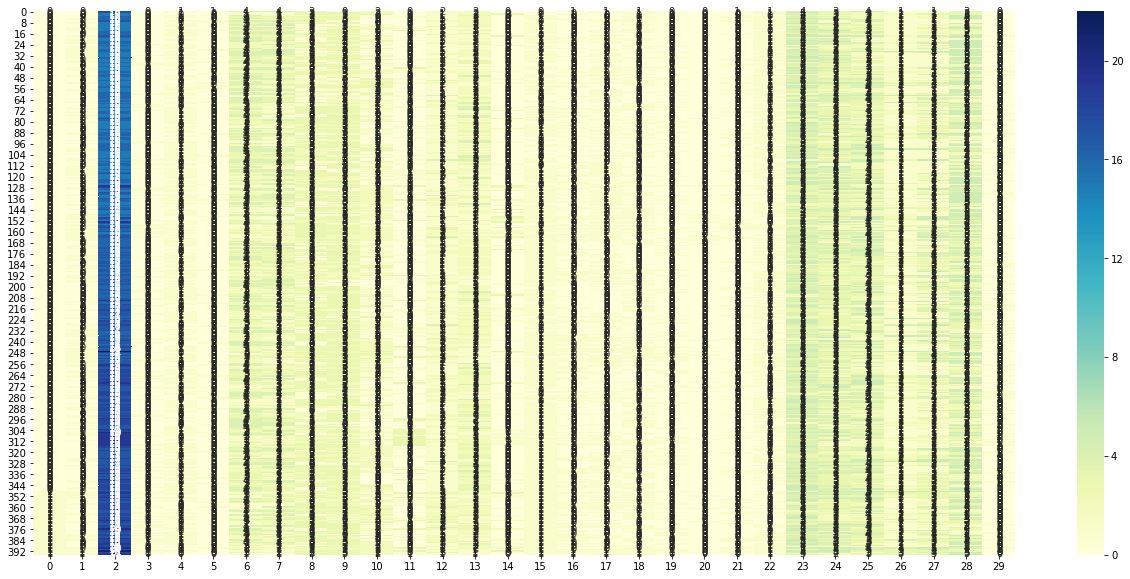

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

plt.figure(figsize=(22,10))
cdata = np.array(students_data.drop('G3').collect())
sns.heatmap(cdata, cmap="YlGnBu", annot=True)

In [13]:
from pyspark.mllib.stat import Statistics
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName("grades").setMaster("local[*]")
cs = SparkContext.getOrCreate(conf)

students_dataRDD=students_data.rdd.map(lambda row: row[0:])
corrlation_matrix= Statistics.corr(students_dataRDD, method = "pearson")
rdd0= cs.parallelize(corrlation_matrix)
rdd1= rdd0.map(lambda x: [float(i) for i in x])
corrlation_matrix[1]

array([-0.01228554,  1.        , -0.02860579,  0.02850421, -0.0898618 ,
       -0.02344278,  0.07822789,  0.03487831, -0.15356191, -0.01280355,
        0.00982182, -0.0298963 ,  0.05972178, -0.30626762,  0.04443588,
        0.13827095,  0.15162262,  0.12912562, -0.09983318,  0.00820276,
        0.15105552, -0.0441129 ,  0.10202301,  0.05897094,  0.23874425,
        0.0758974 ,  0.26817098,  0.27419377,  0.14358817, -0.03052117,
        0.09124285])

In [14]:
students_data.groupby('school').count().show()

+------+-----+
|school|count|
+------+-----+
|     1|   46|
|     0|  349|
+------+-----+



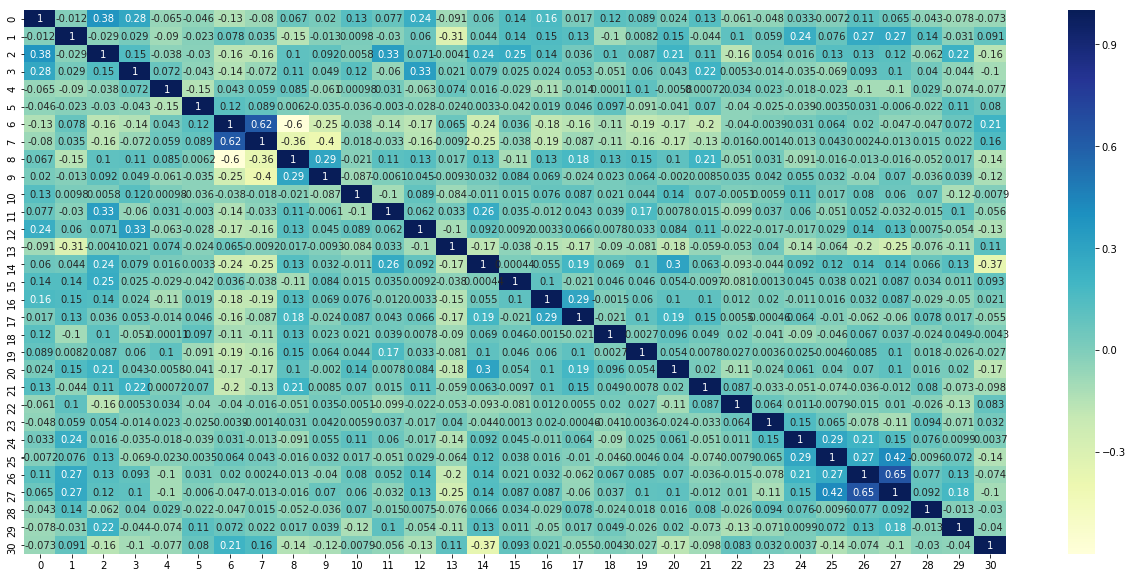

In [18]:
plt.figure(figsize=(22,10))
sns.heatmap(corrlation_matrix, cmap="YlGnBu", annot=True)

In [19]:
columns_to_drop = ['traveltime', 'studytime ', 'freetime', 'famrel ','Dalc', 'Walc', 'health']
sdata= sdata.drop(*columns_to_drop)

In [20]:
sdata.dtypes

[('school', 'bigint'),
 ('sex', 'bigint'),
 ('age', 'bigint'),
 ('address', 'bigint'),
 ('famsize', 'bigint'),
 ('Pstatus', 'bigint'),
 ('Medu', 'bigint'),
 ('Fedu', 'bigint'),
 ('Mjob', 'bigint'),
 ('Fjob', 'bigint'),
 ('reason', 'bigint'),
 ('guardian', 'bigint'),
 ('studytime', 'bigint'),
 ('failures', 'bigint'),
 ('schoolsup', 'bigint'),
 ('famsup', 'bigint'),
 ('paid', 'bigint'),
 ('activities', 'bigint'),
 ('nursery', 'bigint'),
 ('higher', 'bigint'),
 ('internet', 'bigint'),
 ('romantic', 'bigint'),
 ('famrel', 'bigint'),
 ('goout', 'bigint'),
 ('absences', 'bigint'),
 ('G3', 'bigint')]

In [21]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(
  inputCols=['school',
 'sex',
 'age',
 'famsize',
 'address',           
 'Pstatus',
 'Medu', 
 'Fedu', 
 'Mjob', 
 'Fjob', 
 'reason', 
 'guardian', 
 'studytime', 
 'failures', 
 'schoolsup',
 'famsup',
 'paid', 
 'activities', 
 'nursery', 
 'higher', 
 'internet', 
 'romantic', 
 'famrel', 
 'goout', 
 'absences'],
 outputCol="features")
output = assembler.transform(sdata)
sdata1 = output.select("features",'G3')


In [22]:
sdata1.printSchema()

root
 |-- features: vector (nullable = true)
 |-- G3: long (nullable = true)



In [23]:
train_data,test_data = sdata1.randomSplit([0.7,0.3])

In [20]:
train_data.count()

473

In [21]:
test_data.count()

203

In [24]:
from pyspark.ml.classification import DecisionTreeClassifier,RandomForestClassifier,LogisticRegression,NaiveBayes
from pyspark.ml import Pipeline

In [25]:
dtc = DecisionTreeClassifier(labelCol='G3',featuresCol='features')
rfc = RandomForestClassifier(labelCol='G3',featuresCol='features')
LR = DecisionTreeClassifier(labelCol='G3',featuresCol='features')
NB = RandomForestClassifier(labelCol='G3',featuresCol='features')


In [26]:
dtc_model = dtc.fit(train_data)
rfc_model = rfc.fit(train_data)
LR_model = LR.fit(train_data)
NB_model = NB.fit(train_data)

In [27]:
dtc_predictions = dtc_model.transform(test_data)
rfc_predictions = rfc_model.transform(test_data)
LR_predictions = LR_model.transform(test_data)
NB_predictions = NB_model.transform(test_data)

In [37]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
acc_evaluator = MulticlassClassificationEvaluator(labelCol="G3", predictionCol="prediction", metricName="accuracy")
dtc_acc = acc_evaluator.evaluate(dtc_predictions)
rfc_acc = acc_evaluator.evaluate(rfc_predictions)
LR_acc = acc_evaluator.evaluate(LR_predictions)
NB_acc = acc_evaluator.evaluate(NB_predictions)
print("Here are the results!")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))
print('-'*40)
print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_acc*100))
print('-'*40)
print('An ensemble using Logistic Regression has an accuracy of: {0:2.2f}%'.format(LR_acc*100))
print('-'*40)
print('An ensemble using Naive Bayes has an accuracy of: {0:2.2f}%'.format(NB_acc*100))

Here are the results!
----------------------------------------
A single decision tree has an accuracy of: 66.34%
----------------------------------------
A random forest ensemble has an accuracy of: 47.80%
----------------------------------------
An ensemble using Logistic Regression has an accuracy of: 48.78%
----------------------------------------
An ensemble using Naive Bayes has an accuracy of: 56.59%


In [28]:
from pyspark.ml.classification import DecisionTreeClassifier
dtc = DecisionTreeClassifier(labelCol='G3',featuresCol='features', maxDepth=8)

In [29]:
train_data,test_data = sdata1.randomSplit([0.7,0.3])
print('-'*40)
print('The size of training data:' +str(train_data.count()))
print('-'*40)
print('The size of testing data:'  + str(test_data.count()))

----------------------------------------
The size of training data:483
----------------------------------------
The size of testing data:193


In [30]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
acc_evaluator = MulticlassClassificationEvaluator(labelCol="G3", predictionCol="prediction", metricName="accuracy")
dtc = DecisionTreeClassifier(labelCol='G3',featuresCol='features', maxDepth=8)
dtc_model = dtc.fit(train_data)
dtc_predictions = dtc_model.transform(test_data)
dtc_acc = acc_evaluator.evaluate(dtc_predictions)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))

A single decision tree has an accuracy of: 63.73%


In [40]:
print(dtc_model.toDebugString)

index = 0
for feature in feature_name:
    print(' feature ' + str(index) + ' : ' + feature_name[index])
    index += 1

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_4381b3ef645b9a9d2acf) of depth 8 with 141 nodes
  If (feature 13 <= 0.0)
   If (feature 8 <= 2.0)
    If (feature 2 <= 17.0)
     If (feature 24 <= 0.0)
      If (feature 18 <= 0.0)
       If (feature 19 <= 0.0)
        If (feature 9 <= 0.0)
         If (feature 20 <= 0.0)
          Predict: 3.0
         Else (feature 20 > 0.0)
          Predict: 2.0
        Else (feature 9 > 0.0)
         If (feature 6 <= 2.0)
          Predict: 2.0
         Else (feature 6 > 2.0)
          Predict: 3.0
       Else (feature 19 > 0.0)
        Predict: 0.0
      Else (feature 18 > 0.0)
       If (feature 15 <= 0.0)
        If (feature 5 <= 0.0)
         If (feature 9 <= 1.0)
          Predict: 2.0
         Else (feature 9 > 1.0)
          Predict: 2.0
        Else (feature 5 > 0.0)
         Predict: 1.0
       Else (feature 15 > 0.0)
        If (feature 6 <= 3.0)
         If (feature 0 <= 0.0)
          Predict: 2.0
         Else (feature 0 > 0

Text(0,0.5,'Importance')

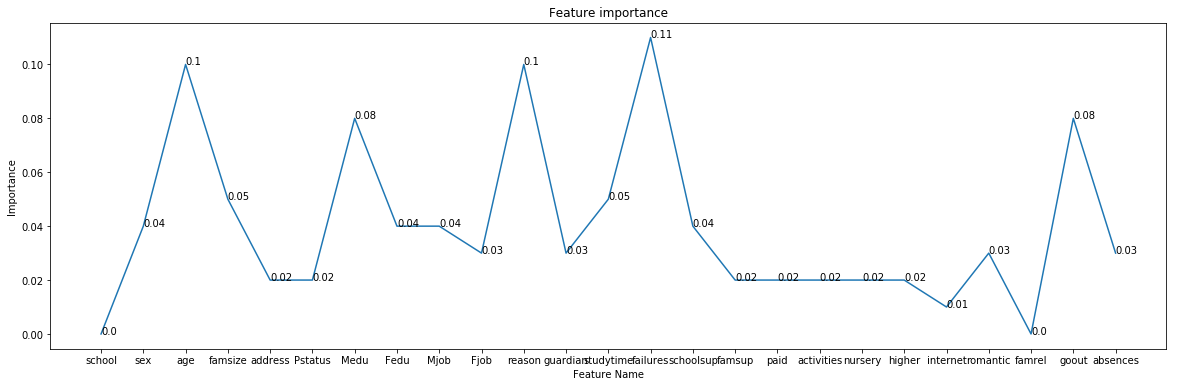

In [30]:

import numpy as np
import matplotlib.pyplot as plt 

feature_name = ['school',
 'sex',
 'age',
 'famsize',
 'address',           
 'Pstatus',
 'Medu', 
 'Fedu', 
 'Mjob', 
 'Fjob', 
 'reason', 
 'guardian', 
 'studytime', 
 'failures', 
 'schoolsup',
 'famsup',
 'paid', 
 'activities', 
 'nursery', 
 'higher', 
 'internet', 
 'romantic', 
 'famrel', 
 'goout', 
 'absences']

list_importance1 = np.array(dtc_model.featureImportances)
list_importance = [round(elem, 2) for elem in list_importance1]


plt.figure(figsize=(20, 6))
plt.plot(feature_name, list_importance)
for a,b in zip(feature_name, list_importance): 
    plt.text(a, b, str(b))
    

plt.title("Feature importance")
plt.xlabel("Feature Name")
plt.ylabel("Importance")

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


(25,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24],[0.030233496111218124,0.03311367941991357,0.06631207744669816,0.024923250941167572,0.03811176183603638,0.03914920422595016,0.04411305430981565,0.046837464086682296,0.07846908678074598,0.04228110292834707,0.03432802244080001,0.07248406891419418,0.04709721001919447,0.11185082900794065,0.05834242894425186,0.022384361711198553,0.019627563316377487,0.045771046962022,0.033683666441531694,0.01730295591026916,0.0074031467570913195,0.025236332477194052,0.020333805220963248,0.04061038379039655])


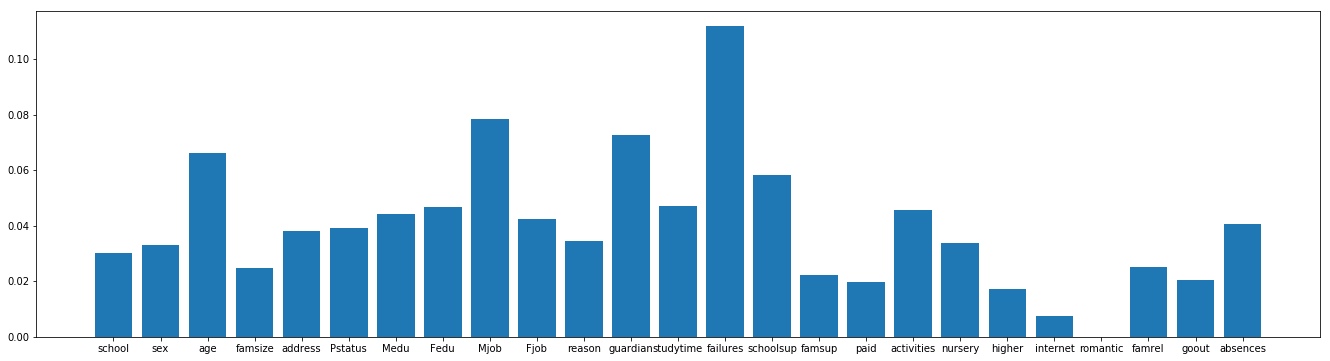

In [32]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from matplotlib import pyplot
feature_name = ['school',
 'sex',
 'age',
 'famsize',
 'address',           
 'Pstatus',
 'Medu', 
 'Fedu', 
 'Mjob', 
 'Fjob', 
 'reason', 
 'guardian', 
 'studytime', 
 'failures', 
 'schoolsup',
 'famsup',
 'paid', 
 'activities', 
 'nursery', 
 'higher', 
 'internet', 
 'romantic', 
 'famrel', 
 'goout', 
 'absences']

print(dtc_model.featureImportances)
plt.figure (figsize=(23, 6))

pyplot.bar(feature_name, dtc_model.featureImportances)
pyplot.show()


In [31]:
!pip3 install --user pydotplus

In [ ]:

index = 0
for feature in feature_name:
    print(' feature ' + str(index) + ' is ' + feature_name[index])
    index += 1

In [34]:
!pip install --user yellowbrick

You should consider upgrading via the 'pip install --upgrade pip' command.


In [53]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

my_binary_eval = BinaryClassificationEvaluator(labelCol = 'G3')
print("DTC")
print(my_binary_eval.evaluate(dtc_predictions))


DTC
0.7120989108036503


In [81]:
from pyspark.mllib.regression import LabeledPoint


rdd = sdata1.rdd.map(lambda row: LabeledPoint(row['label'], row['features'].toArray()))


In [89]:

type(data)

pyspark.rdd.PipelinedRDD

In [84]:
from pyspark.mllib.classification import LogisticRegressionWithLBFGS
from pyspark.mllib.util import MLUtils
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.mllib.regression import LabeledPoint
# Load training data in LIBSVM format
#data = MLUtils.loadLibSVMFile(sc, "data/mllib/sample_multiclass_classification_data.txt")
#training = rdd.map(lambda row: LabeledPoint(row.label, row.features))
# Split data into training (60%) and test (40%)
training, test = rdd.randomSplit([0.6, 0.4], seed=11)
training.cache()

# Run training algorithm to build the model
model = LogisticRegressionWithLBFGS.train(training, numClasses=3)

# Compute raw scores on the test set
predictionAndLabels = test.map(lambda lp: (float(model.predict(lp.features)), lp.label))

# Instantiate metrics object
metrics = MulticlassMetrics(predictionAndLabels)

# Overall statistics
precision = metrics.precision()
recall = metrics.recall()
f1Score = metrics.fMeasure()
print("Summary Stats")
print("Precision = %s" % precision)
print("Recall = %s" % recall)
print("F1 Score = %s" % f1Score)

# Statistics by class
labels = data.map(lambda lp: lp.label).distinct().collect()
for label in sorted(labels):
    print("Class %s precision = %s" % (label, metrics.precision(label)))
    print("Class %s recall = %s" % (label, metrics.recall(label)))
    print("Class %s F1 Measure = %s" % (label, metrics.fMeasure(label, beta=1.0)))

# Weighted stats
print("Weighted recall = %s" % metrics.weightedRecall)
print("Weighted precision = %s" % metrics.weightedPrecision)
print("Weighted F(1) Score = %s" % metrics.weightedFMeasure())
print("Weighted F(0.5) Score = %s" % metrics.weightedFMeasure(beta=0.5))
print("Weighted false positive rate = %s" % metrics.weightedFalsePositiveRate)

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 137.0 failed 1 times, most recent failure: Lost task 0.0 in stage 137.0 (TID 328, localhost, executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/sql/types.py", line 1484, in __getitem__
    idx = self.__fields__.index(item)
ValueError: 'label' is not in list

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/worker.py", line 174, in main
    process()
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/worker.py", line 169, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/serializers.py", line 268, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/pyspark/rddsampler.py", line 95, in func
    for obj in iterator:
  File "<ipython-input-81-0a59ecebe20e>", line 4, in <lambda>
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/sql/types.py", line 1489, in __getitem__
    raise ValueError(item)
ValueError: label

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD$$anonfun$8.apply(RDD.scala:336)
	at org.apache.spark.rdd.RDD$$anonfun$8.apply(RDD.scala:334)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1021)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:996)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:936)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:996)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:700)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:334)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:285)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:99)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:322)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1435)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1423)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1422)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1422)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:802)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:802)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:802)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1650)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1605)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1594)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:628)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1925)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1938)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1951)
	at org.apache.spark.api.python.PythonRDD$.runJob(PythonRDD.scala:441)
	at org.apache.spark.api.python.PythonRDD.runJob(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/sql/types.py", line 1484, in __getitem__
    idx = self.__fields__.index(item)
ValueError: 'label' is not in list

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/worker.py", line 174, in main
    process()
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/worker.py", line 169, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/serializers.py", line 268, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/pyspark/rddsampler.py", line 95, in func
    for obj in iterator:
  File "<ipython-input-81-0a59ecebe20e>", line 4, in <lambda>
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/sql/types.py", line 1489, in __getitem__
    raise ValueError(item)
ValueError: label

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD$$anonfun$8.apply(RDD.scala:336)
	at org.apache.spark.rdd.RDD$$anonfun$8.apply(RDD.scala:334)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1021)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:996)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:936)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:996)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:700)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:334)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:285)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:99)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:322)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


In [94]:
from pyspark.mllib.classification import LogisticRegressionWithLBFGS
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.mllib.regression import LabeledPoint
data = sdata1.rdd.map(lambda row: LabeledPoint(row[0], row[1]))

# Split data into training (60%) and test (40%)
training, test = data.randomSplit([0.6, 0.4], seed=11)
training.cache()

# Run training algorithm to build the model
model = LogisticRegressionWithLBFGS.train(training)

# Compute raw scores on the test set
predictionAndLabels = test.map(lambda lp: (float(model.predict(lp.features)), lp.label))

# Instantiate metrics object
metrics = BinaryClassificationMetrics(predictionAndLabels)

# Area under precision-recall curve
print("Area under PR = %s" % metrics.areaUnderPR)

# Area under ROC curve
print("Area under ROC = %s" % metrics.areaUnderROC)

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 146.0 failed 1 times, most recent failure: Lost task 0.0 in stage 146.0 (TID 337, localhost, executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/worker.py", line 174, in main
    process()
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/worker.py", line 169, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/serializers.py", line 268, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/pyspark/rddsampler.py", line 95, in func
    for obj in iterator:
  File "<ipython-input-94-d5433cee3452>", line 4, in <lambda>
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/mllib/regression.py", line 53, in __init__
    self.label = float(label)
TypeError: float() argument must be a string or a number, not 'SparseVector'

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD$$anonfun$8.apply(RDD.scala:336)
	at org.apache.spark.rdd.RDD$$anonfun$8.apply(RDD.scala:334)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1021)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:996)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:936)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:996)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:700)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:334)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:285)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:99)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:322)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1435)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1423)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1422)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1422)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:802)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:802)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:802)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1650)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1605)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1594)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:628)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1925)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1938)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1951)
	at org.apache.spark.api.python.PythonRDD$.runJob(PythonRDD.scala:441)
	at org.apache.spark.api.python.PythonRDD.runJob(PythonRDD.scala)
	at sun.reflect.GeneratedMethodAccessor78.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/worker.py", line 174, in main
    process()
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/worker.py", line 169, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/serializers.py", line 268, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/pyspark/rddsampler.py", line 95, in func
    for obj in iterator:
  File "<ipython-input-94-d5433cee3452>", line 4, in <lambda>
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/mllib/regression.py", line 53, in __init__
    self.label = float(label)
TypeError: float() argument must be a string or a number, not 'SparseVector'

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD$$anonfun$8.apply(RDD.scala:336)
	at org.apache.spark.rdd.RDD$$anonfun$8.apply(RDD.scala:334)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1021)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:996)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:936)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:996)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:700)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:334)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:285)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:99)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:322)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
